In [3]:
import gzip
import pandas as pd

In [4]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
with gzip.open('compensation_cpi.csv.gz', 'rb') as f:
    df = pd.read_csv(f)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466589 entries, 0 to 1466588
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1466589 non-null  int64  
 1   department          1466587 non-null  object 
 2   job_title           1466043 non-null  object 
 3   base_salary         1465890 non-null  float64
 4   overtime            1433207 non-null  float64
 5   irregular_cash      1466155 non-null  float64
 6   total_cash          1466589 non-null  float64
 7   retirement          1466589 non-null  float64
 8   health              1447602 non-null  float64
 9   other_benefits      830557 non-null   float64
 10  total_benefits      1466589 non-null  float64
 11  total_compensation  1466589 non-null  float64
 12  city_id             1466589 non-null  int64  
 13  annual_average_cpi  1466589 non-null  float64
 14  inflation_rate      1466589 non-null  float64
dtypes: float64(11),

In [89]:
df.head(3)

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
0,2020,Recreation And Park Commission,Camp Assistant,5257.50,0.0,139.32,5396.82,0.0,0.0,418.88,418.88,5815.70,2,258.8,1.2
1,2020,Registrar,Junior Clerk,7699.19,1916.9,0.00,9616.09,0.0,0.0,746.36,746.36,10362.45,2,258.8,1.2
2,2020,Registrar,Junior Clerk,2619.15,930.5,0.00,3549.65,0.0,0.0,275.51,275.51,3825.16,2,258.8,1.2


In [90]:
df[df['department'].str.contains('District') == True]['department'].unique()

array(['District Attorney', 'DAT District Attorney',
       'Council - District 7', 'Council - District 2',
       'Council - District 10', 'Council - District 8',
       'Council - District 3', 'Council - District 5',
       'Council - District 1', 'Council - District 9',
       'Council - District 4', 'Council - District 6', 'Parks District 8'],
      dtype=object)

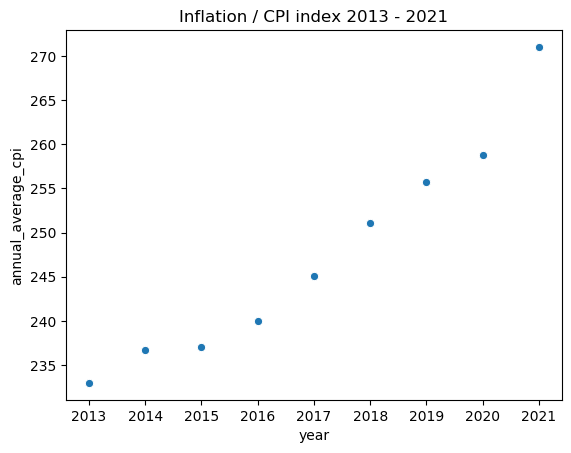

In [91]:
sns.scatterplot(data=df,x='year',y="annual_average_cpi")
plt.title("Inflation / CPI index 2013 - 2021");

In [92]:
#we have two missing department names but they are both police
df[df['department'].isna()]

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
139761,2017,NaN,Sheriff's Cadet,49630.50,15016.51,3197.52,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24,2,245.1,2.1
430579,2017,NaN,Police Officer 2,116189.62,40990.09,2260.08,159439.80,20076.66,14515.01,2724.05,37315.72,196755.52,2,245.1,2.1


In [93]:
#fill in the missing police department names
df['department'].fillna('Police',inplace=True)

In [94]:
df['department'].value_counts()

POLICE                          136819
WATER AND POWER                 109906
Public Health                    95725
RECREATION AND PARKS             84680
DPH Public Health                73093
                                 ...  
Airport-Custodians                   1
Police-Crisis Management             1
Police-TABS                          1
Attorney-Part Time                   1
DOT/Pavement Maint Southeast         1
Name: department, Length: 550, dtype: int64

### Condensing Department Names

In [95]:
def replace_text(text):
    if pd.isna(text) or text is None:
        return text
    elif target_word.lower() in text.lower():
        return new_word
    else:
        return text

In [96]:
target_word= "Police"
new_word= "Police"
df['department'] = df['department'].apply(replace_text)

In [97]:
dept_dict = {
    'Police': 'Police', 'Sheriff': 'Police', "Vcet" : "Police",   
    "Fire" : "Emergency Management",    "Emergency" : "Emergency Management",
    "PW" : "Public Works",    "Public" : "Public Works",    "Water" : "Public Works",    "DOT" : "Public Works",    "Transport" : "Public Works",
    "Plan" : "Public Works",    "Building" : "Public Works",    #"District" : "Public Works",    
    "PRNS" : "Parks",    "Recre" : "Parks",    "Zoo" : "Parks",    "Parks" : "Parks",    "Arena" : "Parks",
    "City" : "City Mgmt",    "Convention" : "City Mgmt",    "Neighbor" : "City Mgmt",    "Election" : "City Mgmt",    "Council" : "City Mgmt",
    "CII" : "City Mgmt",    "Clerk" : "City Mgmt",    "Registrar" : "City Mgmt",    "Housing" : "City Mgmt",    "Mayor" : "City Mgmt",    "rda" : "City Mgmt",
    "Airport" : "Airport",    "Airside" : "Airport",
    "Finance" : "Finance",    "Auditor" : "Finance",    "Assessor" : "Finance",    "Controller" : "Finance",    "Tax" : "Finance", "Treasure" : "Finance",
    "Board" : "Law and Reg",    "Attorney" : "Law and Reg",    "Court" : "Law and Reg",
    "Ethics" : "Law and Reg",    "Probation" : "Law and Reg",    "Regulation" : "Law and Reg",
    "prt" : "Port",    "port" : "Port", "Harbor" : "Port",
    "Human" : "Human Services",    "Retire" : "Human Services",    "Child" : "Human Services",    "Service" : "Human Services",
    "Personnel" : "Human Services",    "Aging" : "Human Services",    "Women" : "Human Services",    "Pension" : "Human Services",
    "Disability" : "Human Services",    "Families" : "Human Services", "Youth" : "Human Services",
    "ESD" : "Human Services",    "Employee" : "Human Services",
    "Info" : "IT",    "Tech" : "IT",
    "Envi" : "Energy, Env, Economy",    "Energy" : "Energy, Env, Economy",    "Power" : "Energy, Env, Economy", "Econ" : "Energy, Env, Economy",
    "Science" : "Libraries, Arts, Science, Museums",    "Librar" : "Libraries, Arts, Science, Museums",    "Museum" : "Libraries, Arts, Science, Museums",
    "Memorial" : "Libraries, Arts, Science, Museums",    "Monument" : "Libraries, Arts, Science, Museums",    "Arts" : "Libraries, Arts, Science, Museums",
    "Cultur" : "Libraries, Arts, Science, Museums", "Art Commission" : "Libraries, Arts, Science, Museums"
}

In [98]:
for key in dept_dict:
    target_word= key
    new_word= dept_dict[key]
    df['department'] = df['department'].apply(replace_text)

In [99]:
df['department'].value_counts(normalize=True)

Public Works                         0.384807
Police                               0.159051
Port                                 0.098913
Parks                                0.097807
Human Services                       0.085051
Emergency Management                 0.057883
City Mgmt                            0.046575
Libraries, Arts, Science, Museums    0.022667
Law and Reg                          0.019740
Finance                              0.014328
IT                                   0.008094
Energy, Env, Economy                 0.005083
Name: department, dtype: float64

### Adjusting all numbers to present-day CPI

In [100]:
df['base_salary'] = df['base_salary'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['overtime'] = df['overtime'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['irregular_cash'] = df['irregular_cash'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['total_cash'] = df['total_cash'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])

df['retirement'] = df['retirement'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['health'] = df['health'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['other_benefits'] = df['other_benefits'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['total_benefits'] = df['total_benefits'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['total_compensation'] = df['total_compensation'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])

In [101]:
df.head()

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
0,2020,Parks,Camp Assistant,5505.341963,0.000000,145.887635,5651.229598,0.000000,0.000000,438.626275,438.626275,6089.855873,2,258.8,1.2
1,2020,City Mgmt,Junior Clerk,8062.134815,2007.263910,0.000000,10069.398725,0.000000,0.000000,781.543895,781.543895,10850.942620,2,258.8,1.2
2,2020,City Mgmt,Junior Clerk,2742.618431,974.364374,0.000000,3716.982805,0.000000,0.000000,288.497720,288.497720,4005.480526,2,258.8,1.2
3,2020,City Mgmt,Clerk,1958.802241,619.090495,0.000000,2577.892736,0.000000,0.000000,200.077164,200.077164,2777.969900,2,258.8,1.2
4,2020,Public Works,Engineer,166298.647372,0.000000,5944.554637,172243.202009,35106.269861,15799.729328,12219.283192,63125.282380,235368.484389,2,258.8,1.2


### More cleaning

Changing integers for Year and City into categorical variables

In [102]:
df['year'] = df['year'].astype('category')
df['city_id'] = df['city_id'].astype('category')

In [103]:
df.isna().sum()

year                       0
department                 0
job_title                546
base_salary              699
overtime               33382
irregular_cash           434
total_cash                 0
retirement                 0
health                 18987
other_benefits        636032
total_benefits             0
total_compensation         0
city_id                    0
annual_average_cpi         0
inflation_rate             0
dtype: int64

I feel justified filling in null "health" and "other_benefits" values with 0 because it's the single most common practice

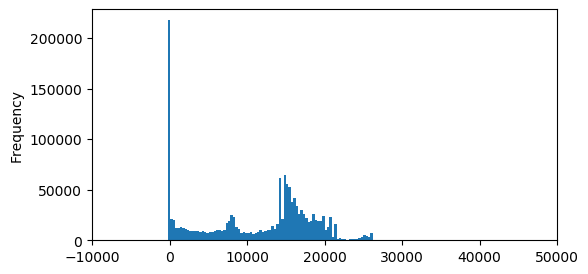

In [104]:
plt.figure(figsize=(6,3))
plt.xlim(-10000,50000)
df['health'].plot.hist(bins=1000);

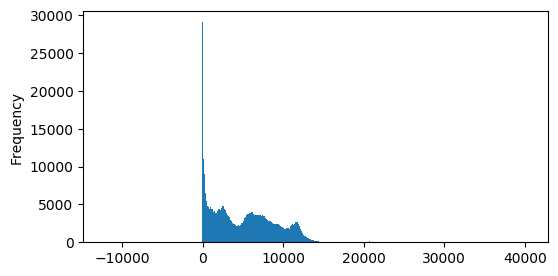

In [105]:
plt.figure(figsize=(6,3))
#plt.xlim(-5000,30000)
df['other_benefits'].plot.hist(bins=1000);

In [114]:
df['job_title'] = df['job_title'].fillna("Not disclosed")
df['overtime'] = df['overtime'].fillna(0)
df['irregular_cash'] = df['irregular_cash'].fillna(0)
df['health'] = df['health'].fillna(0)
df['other_benefits'] = df['other_benefits'].fillna(0)

df['base_salary'] = df['base_salary'].fillna((df['total_cash'] - df['overtime'] - df['irregular_cash']))

df.isna().sum()

year                  0
department            0
job_title             0
base_salary           0
overtime              0
irregular_cash        0
total_cash            0
retirement            0
health                0
other_benefits        0
total_benefits        0
total_compensation    0
city_id               0
annual_average_cpi    0
inflation_rate        0
dtype: int64

### Some visuals

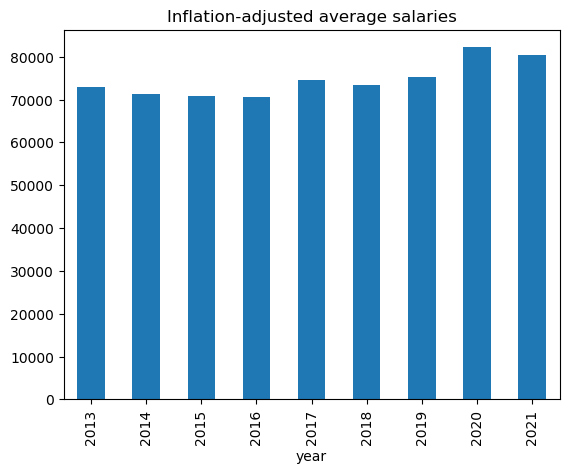

In [28]:
df.groupby('year')['base_salary'].mean().plot.bar()
plt.title("Inflation-adjusted average salaries");

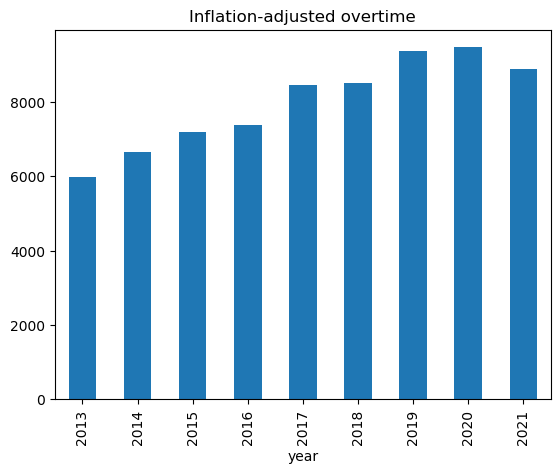

In [30]:
df.groupby('year')['overtime'].mean().plot.bar()
plt.title("Inflation-adjusted average overtime");

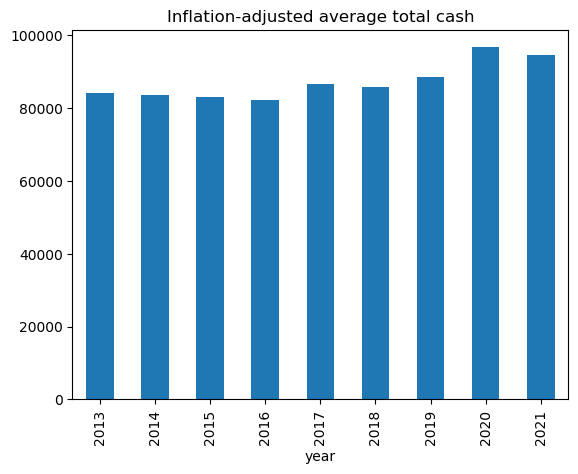

In [32]:
df.groupby('year')['total_cash'].mean().plot.bar()
plt.title("Inflation-adjusted average total cash");

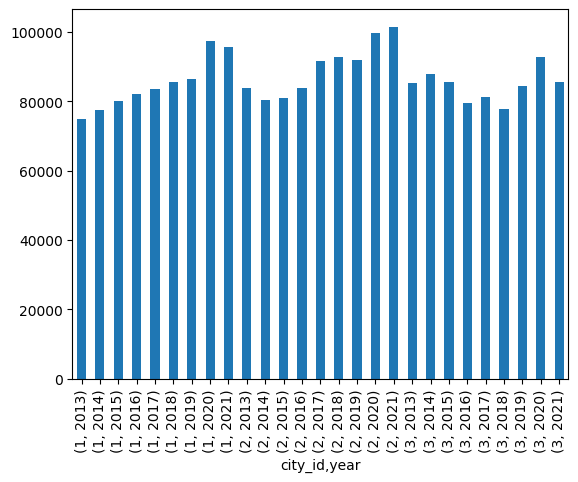

In [40]:
df.groupby(['city_id','year'])['total_cash'].mean().plot.bar()

## SageMaker regression
Following along here https://towardsdatascience.com/using-aws-sagemakers-linear-learner-to-solve-regression-problems-36732d802ba6

In [41]:
import sagemaker
import boto3

sess = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sess.default_bucket()
region = boto3.Session().region_name

sm = boto3.Session().client(service_name="sagemaker", region_name=region)
s3 = boto3.Session().client(service_name="s3", region_name=region)